In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/Users/xinyue/Desktop/Project 2/Bendigo.csv'
df = pd.read_csv(file_path)
print(df)

  Unnamed: 0                   Unnamed: 1 Mar 2010 Unnamed: 83 Jun 2010  \
0    Bendigo                      Bendigo      603     $230.00      575   
1        NaN      Flora Hill-Bendigo East    1,125     $235.00    1,090   
2        NaN  Golden Square-Kangaroo Flat      548     $230.00      558   
3        NaN                North Bendigo      676     $225.00      693   
4        NaN                  Group Total    2,952     $230.00    2,916   

  Unnamed: 85 Sep 2010 Unnamed: 87 Dec 2010 Unnamed: 89  ... Mar 2019  \
0     $231.00      598     $240.00      584     $240.00  ...      546   
1     $240.00    1,084     $240.00    1,109     $250.00  ...    1,049   
2     $230.00      579     $240.00      625     $243.00  ...      615   
3     $230.00      699     $230.00      683     $240.00  ...      953   
4     $230.00    2,960     $240.00    3,001     $241.00  ...    3,163   

  Unnamed: 155 Jun 2019 Unnamed: 157 Sep 2019 Unnamed: 159 Dec 2019  \
0      $300.00      522      $305.00   

In [3]:
# Create a new header row with 'Count' and 'Median' labels starting from the third column
new_header = ['Area', 'Suburb']  # Start with 'Area' and 'Suburb' for the first two columns

# Use a loop to dynamically generate 'Count.1', 'Median.1', 'Count.2', 'Median.2', etc.
count_num = 1  # Initialize count number
median_num = 1  # Initialize median number

# Start from the third column
for i in range(2, len(df.columns)):
    if (i - 2) % 4 == 0:  # Every 4th column should be 'Count'
        new_header.append(f'Count.{count_num}')
        count_num += 1
    elif (i - 2) % 4 == 1:  # Every 2nd column after 'Count' should be 'Median'
        new_header.append(f'Median.{median_num}')
        median_num += 1
    elif (i - 2) % 4 == 2:  # Every 2nd column should be 'Count'
        new_header.append(f'Count.{count_num}')
        count_num += 1
    else:  # Remaining columns are 'Median'
        new_header.append(f'Median.{median_num}')
        median_num += 1

# Assign the new header row to the DataFrame columns
df.columns = new_header

In [4]:
# Filter out the columns that contain 'Median' in their name to get the median rental prices
median_columns = [col for col in df.columns if 'Median' in col]

# Extract only the 'Median' columns along with the 'Suburb' column
median_data = df[['Suburb'] + median_columns].copy()

In [5]:
# Convert each median rental price column to numeric, removing non-numeric characters
for col in median_data.columns:
    if 'Median' in col:
        # Remove any dollar signs or non-numeric characters and convert to numeric
        median_data[col] = pd.to_numeric(median_data[col].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')
print(median_data)

                        Suburb  Median.1  Median.2  Median.3  Median.4  \
0                      Bendigo     230.0     231.0     240.0     240.0   
1      Flora Hill-Bendigo East     235.0     240.0     240.0     250.0   
2  Golden Square-Kangaroo Flat     230.0     230.0     240.0     243.0   
3                North Bendigo     225.0     230.0     230.0     240.0   
4                  Group Total     230.0     230.0     240.0     241.0   

   Median.5  Median.6  Median.7  Median.8  Median.9  ...  Median.32  \
0     250.0     255.0     260.0     260.0     265.0  ...      280.0   
1     250.0     260.0     260.0     270.0     275.0  ...      285.0   
2     250.0     250.0     260.0     265.0     270.0  ...      285.0   
3     240.0     250.0     250.0     260.0     260.0  ...      280.0   
4     250.0     250.0     260.0     260.0     270.0  ...      280.0   

   Median.33  Median.34  Median.35  Median.36  Median.37  Median.38  \
0      280.0      280.0      290.0      300.0      300.0 

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/var/folders/_s/4j24gf8n0ls5dt1yjm000kbr0000gn/T/ipykernel_58423/4014745995.py:5: SyntaxWarning: invalid escape sequence '\$'
  median_data[col] = pd.to_numeric(median_data[col].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')


In [6]:
# Round the 'Median' columns to the nearest integer and convert to integer type
for col in median_columns:
    median_data[col] = median_data[col].round().astype('Int64')  # Use 'Int64' to allow for NaN values

# Print the converted data to ensure that all columns have been properly converted
print("Median Data after conversion to integers:")
print(median_data.head())

Median Data after conversion to integers:
                        Suburb  Median.1  Median.2  Median.3  Median.4  \
0                      Bendigo       230       231       240       240   
1      Flora Hill-Bendigo East       235       240       240       250   
2  Golden Square-Kangaroo Flat       230       230       240       243   
3                North Bendigo       225       230       230       240   
4                  Group Total       230       230       240       241   

   Median.5  Median.6  Median.7  Median.8  Median.9  ...  Median.32  \
0       250       255       260       260       265  ...        280   
1       250       260       260       270       275  ...        285   
2       250       250       260       265       270  ...        285   
3       240       250       250       260       260  ...        280   
4       250       250       260       260       270  ...        280   

   Median.33  Median.34  Median.35  Median.36  Median.37  Median.38  \
0        280   

Growth trend for Bendigo:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
0      <NA>  0.434783  3.896104       0.0  4.166667       2.0  1.960784   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
0       0.0  1.923077        0.0  ...        0.0        0.0   3.571429   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
0   3.448276        0.0   1.666667   1.639344   3.225806    19.6875   

   Average Growth Rate (%)  
0                 1.334254  

[1 rows x 42 columns]


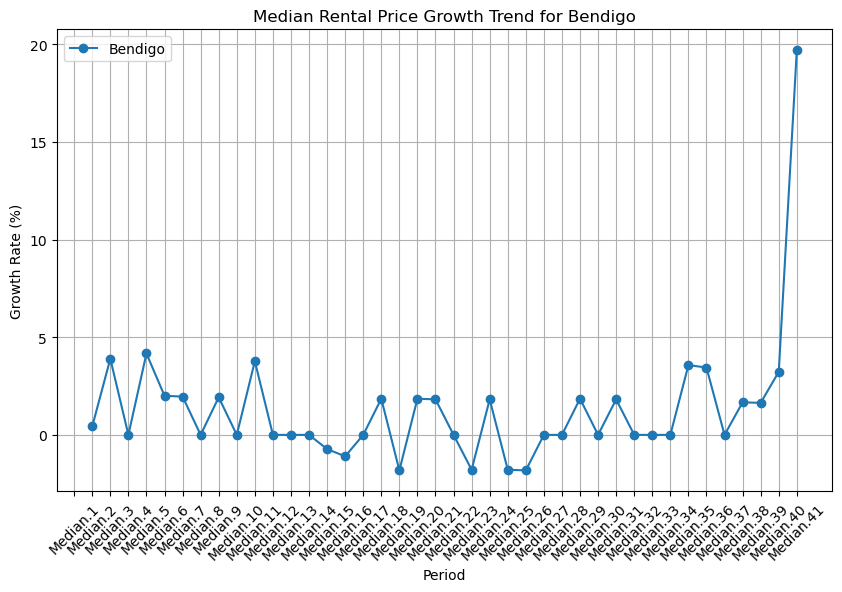

Growth trend for Flora Hill-Bendigo East:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
1      <NA>   2.12766       0.0  4.166667       0.0       4.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
1  3.846154  1.851852   1.818182  ...   1.754386        0.0        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
1   1.724138        0.0   1.694915        0.0        0.0       30.0   

   Average Growth Rate (%)  
1                 1.374232  

[1 rows x 42 columns]


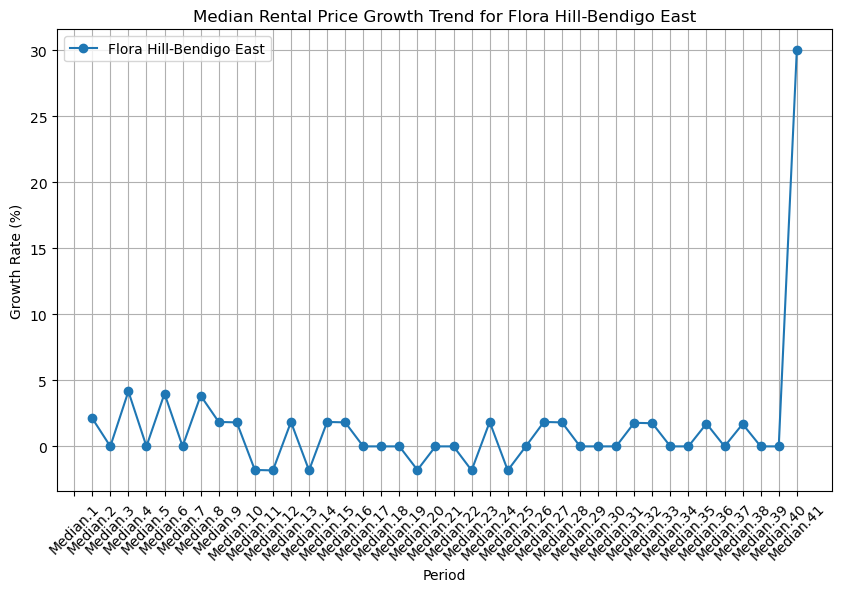

Growth trend for Golden Square-Kangaroo Flat:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
2      <NA>       0.0  4.347826      1.25  2.880658       0.0       4.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
2  1.923077  1.886792        0.0  ...   1.754386   1.724138   1.694915   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
2        0.0        0.0        0.0   3.333333        0.0  29.032258   

   Average Growth Rate (%)  
2                 1.483732  

[1 rows x 42 columns]


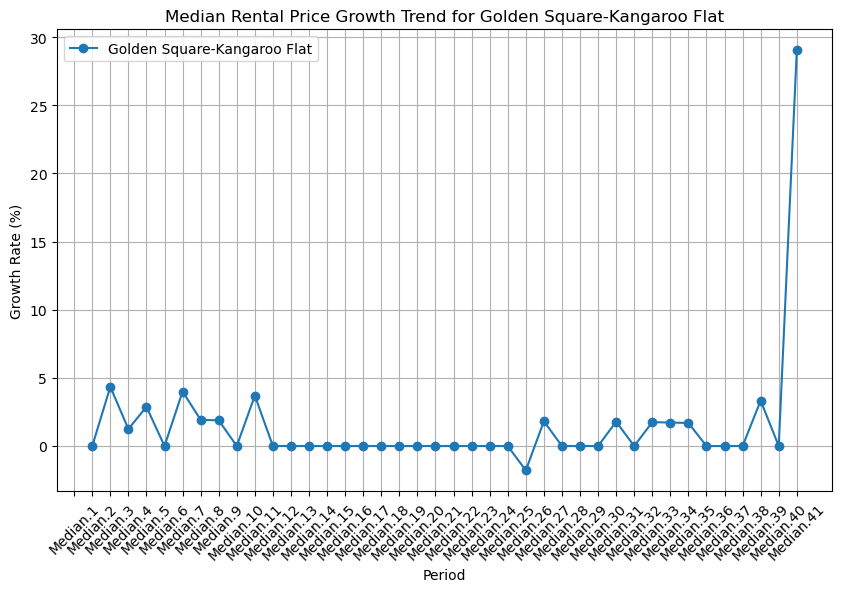

Growth trend for North Bendigo:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
3      <NA>  2.222222       0.0  4.347826       0.0  4.166667       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
3       4.0       0.0   3.846154  ...   1.785714   1.754386        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
3   1.724138   1.694915        0.0        0.0   1.666667  31.147541   

   Average Growth Rate (%)  
3                 1.552567  

[1 rows x 42 columns]


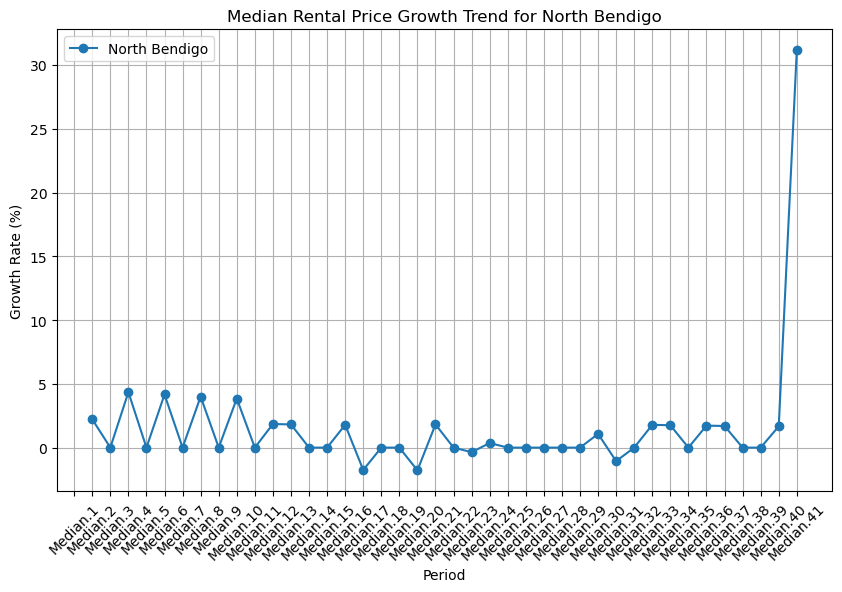

Growth trend for Group Total:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
4      <NA>       0.0  4.347826  0.416667   3.73444       0.0       4.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
4       0.0  3.846154        0.0  ...   1.785714   1.754386        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
4   3.448276        0.0        0.0        0.0   3.333333  29.032258   

   Average Growth Rate (%)  
4                 1.485039  

[1 rows x 42 columns]


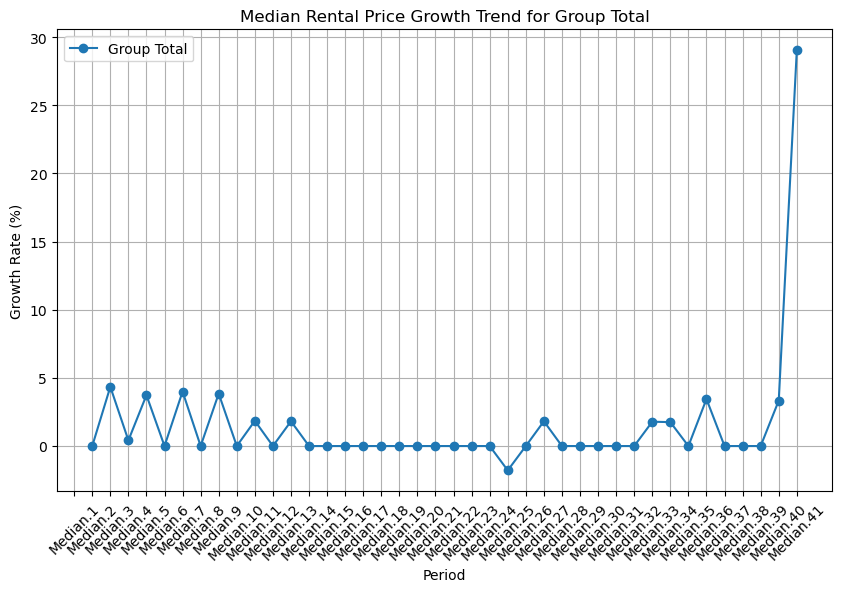

All suburbs growth trends:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
0      <NA>  0.434783  3.896104       0.0  4.166667       2.0  1.960784   
1      <NA>   2.12766       0.0  4.166667       0.0       4.0       0.0   
2      <NA>       0.0  4.347826      1.25  2.880658       0.0       4.0   
3      <NA>  2.222222       0.0  4.347826       0.0  4.166667       0.0   
4      <NA>       0.0  4.347826  0.416667   3.73444       0.0       4.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
0       0.0  1.923077        0.0  ...        0.0        0.0   3.571429   
1  3.846154  1.851852   1.818182  ...   1.754386        0.0        0.0   
2  1.923077  1.886792        0.0  ...   1.754386   1.724138   1.694915   
3       4.0       0.0   3.846154  ...   1.785714   1.754386        0.0   
4       0.0  3.846154        0.0  ...   1.785714   1.754386        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
0   3.

In [7]:
import matplotlib.pyplot as plt
# Calculate the growth rate for each suburb separately and plot them
growth_trends = pd.DataFrame()

for suburb in median_data['Suburb'].unique():
    # Filter the data for the specific suburb
    suburb_data = median_data[median_data['Suburb'] == suburb].copy()

    # Calculate the percentage change in the median rental prices across the periods
    suburb_data_growth = suburb_data[median_columns].pct_change(axis='columns') * 100

    # Calculate cumulative growth or average growth as needed (here, taking the mean growth rate)
    suburb_data_growth['Average Growth Rate (%)'] = suburb_data_growth.mean(axis=1)

    # Append the results to the main DataFrame
    growth_trends = pd.concat([growth_trends, suburb_data_growth], ignore_index=True)

    # Print the growth trend for the suburb
    print(f"Growth trend for {suburb}:")
    print(suburb_data_growth)

    # Plotting the growth trend for the current suburb
    plt.figure(figsize=(10, 6))
    plt.plot(suburb_data_growth.columns[:-1], suburb_data_growth.iloc[0, :-1], marker='o', linestyle='-', label=suburb)
    plt.title(f'Median Rental Price Growth Trend for {suburb}')
    plt.xlabel('Period')
    plt.ylabel('Growth Rate (%)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Optional: Print all the growth trends for all suburbs
print("All suburbs growth trends:")
print(growth_trends)

In [8]:
print(growth_trends["Average Growth Rate (%)"])

0    1.334254
1    1.374232
2    1.483732
3    1.552567
4    1.485039
Name: Average Growth Rate (%), dtype: Float64
